<a href="https://colab.research.google.com/github/yanli499/ChatTime/blob/master/FinalFinalprogress_report_final_PRINTS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="twitter.27B", # trained on Twitter 2014 corpus
                              dim=200)   # embedding size = 200

.vector_cache/glove.twitter.27B.zip: 1.52GB [11:43, 2.16MB/s]                           
100%|█████████▉| 1192587/1193514 [01:29<00:00, 13732.00it/s]

In [0]:
#setup Google Drive
from google.colab import drive
drive.mount('/content/drive')

100%|█████████▉| 1192587/1193514 [01:40<00:00, 13732.00it/s]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt

# file location (make sure to use your file location)
file_dir_ann = '/content/drive/My Drive/Colab Notebooks/aps360/Lectures/'
file_dir_sam = '/content/drive/My Drive/Colab Notebooks/'
file_dir = '/content/drive/My Drive/Colab Notebooks/'

def get_data():
    return csv.reader(open(file_dir_sam + "training.1600000.processed.noemoticon.csv","rt", encoding="latin-1"))

def split_tweet(tweet,print_data):
    # separate punctuations
    
    tweet = tweet.replace(".", " . ") \
                 .replace(",", " , ") \
                 .replace(";", " ; ") \
                 .replace("?", " ? ")   

    if(print_data < 2):
      print("Original Data: ")
      print(tweet)
      print("Split and Normalized Data: ")
      print(tweet.lower().split())
    return tweet.lower().split()

In [0]:
import pandas as pd

columns = ['label', 'text']
#columns = ['text']
df_train = pd.DataFrame(columns=columns)
df_val = pd.DataFrame(columns=columns)
df_test = pd.DataFrame(columns=columns)

In [0]:
def get_tweet_words(glove_vector):
    print_data = 0
    train, valid, test = [], [], []
    tr,vl,te = 0,0,0
    num_pos, num_neg = 0, 0
    pos_train,neg_train, pos_val,neg_val, pos_test,neg_test = 0,0,0,0,0,0
    for i, line in enumerate(get_data()):
        if i % 29 == 0:
            tweet = line[-1]
            #print(tweet)
            idxs = [glove_vector.stoi[w]        # lookup the index of word
                    for w in split_tweet(tweet,print_data)
                    if w in glove_vector.stoi] # keep words that has an embedding
            if not idxs: # ignore tweets without any word with an embedding
                continue
            
            if (print_data < 2):
              print("Glove indexed data: ")
              print(idxs)

            idxs = torch.tensor(idxs) # convert list to pytorch tensor 

            if (print_data < 2):
              print("Tensor data: ")
              print(idxs)

            print_data +=1 

            label = torch.tensor(int(line[0] == "4")).long()
            label_panda = 'sdf'
            if (label.item() == 0):
                label_panda = 'neg'
                num_neg +=1
            elif(label.item() == 1):
                label_panda = 'pos'
                num_pos +=1

            if i % 5 < 3:
                s1 = [tweet, label.item()]
                df_train.loc[tr, 'text'] = tweet
                df_train.loc[tr, 'label'] = label_panda #label.item()
                tr+=1
                train.append((idxs, label))

                if(label == 1):
                  pos_train +=1

                elif(label == 0): 
                  neg_train +=1

            elif i % 5 == 4:
                s1 = [tweet, label.item()]
                df_val.loc[vl, 'text'] = tweet
                df_val.loc[vl, 'label'] = label_panda           
                vl+=1          
                valid.append((idxs, label))

                if(label == 1):
                  pos_val +=1

                elif(label == 0): 
                  neg_val +=1                
            else:
                s1 = [tweet, label.item()]
                df_test.loc[te, 'text'] = tweet
                df_test.loc[te, 'label'] = label_panda
                te+=1           
                test.append((idxs, label))
                if(label == 1):
                  pos_test +=1

                elif(label == 0): 
                  neg_test +=1

    print("num pos = " + str(num_pos))    
    print("num neg = " + str(num_neg))  

    print("num pos train = " + str(pos_train))    
    print("num neg  train = " + str(neg_train))    

    print("num pos val = " + str(pos_val))    
    print("num neg  val = " + str(neg_val))    

    print("num pos test = " + str(pos_test))    
    print("num neg  test = " + str(neg_test))    

    return train, valid, test

train, valid, test = get_tweet_words(glove)


Original Data: 
@switchfoot http://twitpic . com/2y1zl - Awww ,  that's a bummer .   You shoulda got David Carr of Third Day to do it .   ; D
Split and Normalized Data: 
['@switchfoot', 'http://twitpic', '.', 'com/2y1zl', '-', 'awww', ',', "that's", 'a', 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it', '.', ';', 'd']
Glove indexed data: 
[1, 28, 244244, 4, 11, 30001, 1, 15, 9246, 143, 2006, 28452, 39, 4857, 125, 16, 43, 33, 1, 123, 199]
Tensor data: 
tensor([     1,     28, 244244,      4,     11,  30001,      1,     15,   9246,
           143,   2006,  28452,     39,   4857,    125,     16,     43,     33,
             1,    123,    199])
Original Data: 
Meh .  .  .  Almost Lover is the exception .  .  .  this track gets me depressed every time .  
Split and Normalized Data: 
['meh', '.', '.', '.', 'almost', 'lover', 'is', 'the', 'exception', '.', '.', '.', 'this', 'track', 'gets', 'me', 'depressed', 'every', 'time', '.']
Glove indexed d

In [0]:
print(len(train))
print(len(valid))
print(len(test))

32904
10977
10984


In [0]:
print(train[0])

(tensor([     1,     28, 244244,      4,     11,  30001,      1,     15,   9246,
           143,   2006,  28452,     39,   4857,    125,     16,     43,     33,
             1,    123,    199]), tensor(0))


In [0]:
df_train[:3]

,label,text
0,neg,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,neg,My tummy hurts. I wonder if the hypnosis has ...
2,neg,@HibaNick yeah aw but i know i wudnt stand a c...


In [0]:
class TweetRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetRNN, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)#nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, (h0,c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

In [0]:
from torch.nn.utils.rnn import pad_sequence

tweet_padded = pad_sequence([tweet for tweet, label in train[:10]],
                            batch_first=True)
print(tweet_padded.shape)

torch.Size([10, 31])


In [0]:
import random

class TweetBatcher:
    def __init__(self, tweets, batch_size=32, drop_last=False):
        # store tweets by length
        self.tweets_by_length = {}
        for words, label in tweets:
            # compute the length of the tweet
            wlen = words.shape[0]
            # put the tweet in the correct key inside self.tweet_by_length
            if wlen not in self.tweets_by_length:
                self.tweets_by_length[wlen] = []
            self.tweets_by_length[wlen].append((words, label),)
         
        #  create a DataLoader for each set of tweets of the same length
        self.loaders = {wlen : torch.utils.data.DataLoader(
                                    tweets,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    drop_last=drop_last) # omit last batch if smaller than batch_size
            for wlen, tweets in self.tweets_by_length.items()}
        
    def __iter__(self): # called by Python to create an iterator
        # make an iterator for every tweet length
        iters = [iter(loader) for loader in self.loaders.values()]
        while iters:
            # pick an iterator (a length)
            im = random.choice(iters)
            try:
                yield next(im)
            except StopIteration:
                # no more elements in the iterator, remove it
                iters.remove(im)

In [0]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total

In [0]:
def get_loss(model, data_loader, criterion):
    total_loss = 0.0

    for i, batch in enumerate(data_loader):
    # for tweets, labels in data_loader:
        tweets = batch[0]
        labels = batch[1]
        output = model(tweets)
        loss = criterion(output, labels)
        total_loss += loss.item()      
            
    loss = float(total_loss) / (i + 1)
    return loss

In [0]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc, val_loss = [], [], [],[]
    epochs = []
    for epoch in range(num_epochs):
        for tweets, labels in train:
            optimizer.zero_grad()
    
            pred = model(tweets)

            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        val_loss.append(get_loss(model, valid_loader, criterion))
        print("Epoch %d; Train Loss %f; Train Acc %f; Val Loss %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], val_loss[-1], valid_acc[-1]))
    # plotting
    plt.title("Training Curve")
    plt.plot(epochs, losses, label="Train")
    plt.plot(epochs, val_loss, label="Validation")    
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Epoch 1; Train Loss 0.484953; Train Acc 0.748141; Val Loss 0.540695; Val Acc 0.737178
Epoch 2; Train Loss 0.539560; Train Acc 0.765310; Val Loss 0.520481; Val Acc 0.753667
Epoch 3; Train Loss 0.537067; Train Acc 0.772177; Val Loss 0.513129; Val Acc 0.758768
Epoch 4; Train Loss 0.326125; Train Acc 0.773469; Val Loss 0.512736; Val Acc 0.760408
Epoch 5; Train Loss 0.390987; Train Acc 0.780903; Val Loss 0.499559; Val Acc 0.763779
Epoch 6; Train Loss 0.469890; Train Acc 0.786385; Val Loss 0.490458; Val Acc 0.770702
Epoch 7; Train Loss 0.399999; Train Acc 0.788149; Val Loss 0.492321; Val Acc 0.771978
Epoch 8; Train Loss 0.418250; Train Acc 0.791866; Val Loss 0.496484; Val Acc 0.771340
Epoch 9; Train Loss 0.442583; Train Acc 0.791488; Val Loss 0.491847; Val Acc 0.773526
Epoch 10; Train Loss 0.424930; Train Acc 0.798797; Val Loss 0.495247; Val Acc 0.771158
Epoch 11; Train Loss 0.463786; Train Acc 0.804530; Val Loss 0.492899; Val Acc 0.771340
Epoch 12; Train Loss 0.367909; Train Acc 0.806294; V

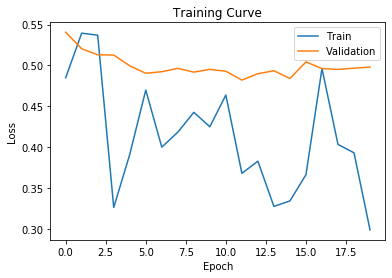

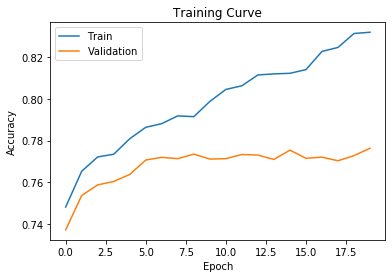

In [0]:
model = TweetRNN(200, 50, 2)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=2e-4)

Epoch 1; Train Loss 0.573681; Train Acc 0.768240; Val Loss 0.506461; Val Acc 0.761410
Epoch 2; Train Loss 0.392324; Train Acc 0.785188; Val Loss 0.494166; Val Acc 0.770520
Epoch 3; Train Loss 0.537581; Train Acc 0.797537; Val Loss 0.477661; Val Acc 0.777535
Epoch 4; Train Loss 0.602713; Train Acc 0.813067; Val Loss 0.486453; Val Acc 0.777353
Epoch 5; Train Loss 0.393725; Train Acc 0.822171; Val Loss 0.491646; Val Acc 0.778355
Epoch 6; Train Loss 0.393608; Train Acc 0.838993; Val Loss 0.475048; Val Acc 0.777170
Epoch 7; Train Loss 0.348146; Train Acc 0.850995; Val Loss 0.495184; Val Acc 0.772524
Epoch 8; Train Loss 0.222204; Train Acc 0.882812; Val Loss 0.515018; Val Acc 0.772798
Epoch 9; Train Loss 0.181533; Train Acc 0.896075; Val Loss 0.548638; Val Acc 0.772433
Epoch 10; Train Loss 0.270635; Train Acc 0.920489; Val Loss 0.605838; Val Acc 0.763597
Epoch 11; Train Loss 0.110710; Train Acc 0.944934; Val Loss 0.662367; Val Acc 0.768880
Epoch 12; Train Loss 0.169712; Train Acc 0.960591; V

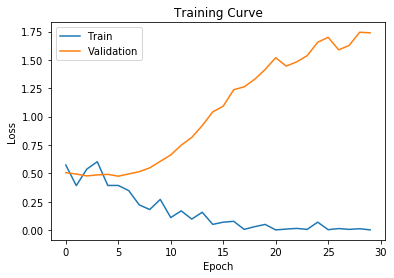

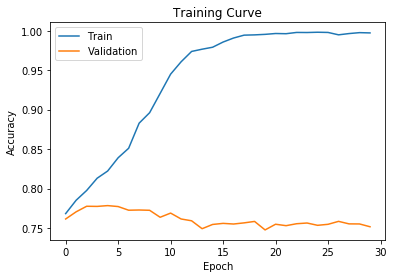

In [0]:
model = TweetRNN(200, 150, 2)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=0.0007)

Epoch 1; Train Loss 0.404059; Train Acc 0.760270; Val Loss 0.527105; Val Acc 0.752482
Epoch 2; Train Loss 0.409321; Train Acc 0.778163; Val Loss 0.510865; Val Acc 0.758677
Epoch 3; Train Loss 0.368799; Train Acc 0.785030; Val Loss 0.485259; Val Acc 0.767332
Epoch 4; Train Loss 0.498670; Train Acc 0.792874; Val Loss 0.483595; Val Acc 0.770611
Epoch 5; Train Loss 0.547943; Train Acc 0.797411; Val Loss 0.482928; Val Acc 0.773162
Epoch 6; Train Loss 0.425315; Train Acc 0.803900; Val Loss 0.475576; Val Acc 0.772615
Epoch 7; Train Loss 0.521692; Train Acc 0.809917; Val Loss 0.483944; Val Acc 0.774984
Epoch 8; Train Loss 0.395417; Train Acc 0.814296; Val Loss 0.481000; Val Acc 0.777899
Epoch 9; Train Loss 0.471635; Train Acc 0.819052; Val Loss 0.479785; Val Acc 0.772342
Epoch 10; Train Loss 0.435424; Train Acc 0.823589; Val Loss 0.489119; Val Acc 0.773709
Epoch 11; Train Loss 0.364129; Train Acc 0.830771; Val Loss 0.487133; Val Acc 0.774893
Epoch 12; Train Loss 0.351913; Train Acc 0.832283; V

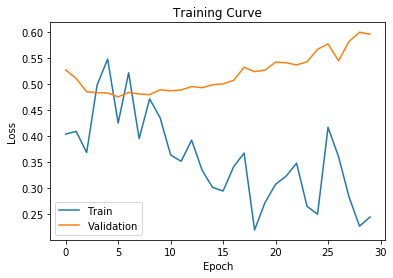

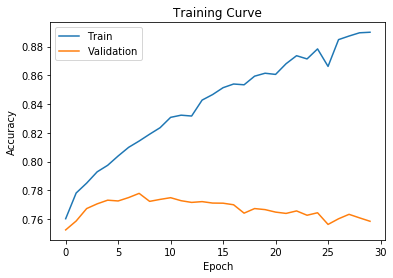

In [0]:
model = TweetRNN(200, 20, 2)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=0.0007)

Epoch 1; Train Loss 0.426701; Train Acc 0.767641; Val Loss 0.513756; Val Acc 0.752847
Epoch 2; Train Loss 0.360959; Train Acc 0.774855; Val Loss 0.504065; Val Acc 0.763961
Epoch 3; Train Loss 0.360409; Train Acc 0.790449; Val Loss 0.491043; Val Acc 0.774984
Epoch 4; Train Loss 0.389542; Train Acc 0.799836; Val Loss 0.483024; Val Acc 0.769609
Epoch 5; Train Loss 0.415686; Train Acc 0.805916; Val Loss 0.485338; Val Acc 0.776715
Epoch 6; Train Loss 0.368238; Train Acc 0.812216; Val Loss 0.483643; Val Acc 0.777079
Epoch 7; Train Loss 0.302099; Train Acc 0.818580; Val Loss 0.485150; Val Acc 0.773526
Epoch 8; Train Loss 0.295653; Train Acc 0.824124; Val Loss 0.491032; Val Acc 0.773253
Epoch 9; Train Loss 0.284278; Train Acc 0.832031; Val Loss 0.497851; Val Acc 0.776351
Epoch 10; Train Loss 0.434984; Train Acc 0.836095; Val Loss 0.509895; Val Acc 0.778264
Epoch 11; Train Loss 0.258454; Train Acc 0.823967; Val Loss 0.527298; Val Acc 0.765601
Epoch 12; Train Loss 0.237657; Train Acc 0.847404; V

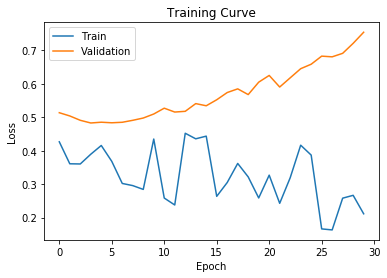

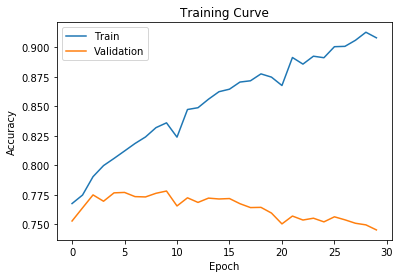

In [0]:
model = TweetRNN(200, 20, 2)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=0.001)

Epoch 1; Train Loss 0.644567; Train Acc 0.665000; Val Loss 0.650878; Val Acc 0.665665
Epoch 2; Train Loss 0.538225; Train Acc 0.720641; Val Loss 0.619035; Val Acc 0.708481
Epoch 3; Train Loss 0.511760; Train Acc 0.747051; Val Loss 0.582322; Val Acc 0.739820
Epoch 4; Train Loss 0.473135; Train Acc 0.759231; Val Loss 0.580092; Val Acc 0.745741
Epoch 5; Train Loss 0.438225; Train Acc 0.767991; Val Loss 0.575237; Val Acc 0.751389
Epoch 6; Train Loss 0.486118; Train Acc 0.776795; Val Loss 0.569220; Val Acc 0.756946
Epoch 7; Train Loss 0.437354; Train Acc 0.782265; Val Loss 0.572462; Val Acc 0.757584
Epoch 8; Train Loss 0.456823; Train Acc 0.785556; Val Loss 0.565862; Val Acc 0.762139
Epoch 9; Train Loss 0.434121; Train Acc 0.786923; Val Loss 0.585394; Val Acc 0.765510
Epoch 10; Train Loss 0.373332; Train Acc 0.794103; Val Loss 0.560289; Val Acc 0.767878
Epoch 11; Train Loss 0.440881; Train Acc 0.793419; Val Loss 0.569046; Val Acc 0.768243
Epoch 12; Train Loss 0.501242; Train Acc 0.797650; V

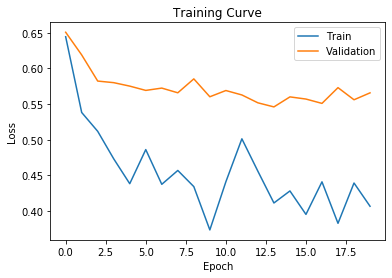

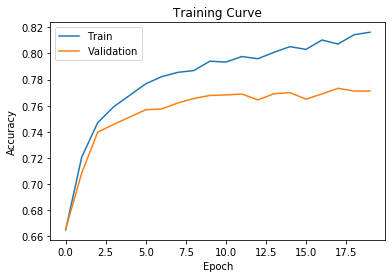

In [0]:
model = TweetRNN(200, 20, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.001)

Epoch 1; Train Loss 0.626917; Train Acc 0.716538; Val Loss 0.657419; Val Acc 0.717591
Epoch 2; Train Loss 0.527956; Train Acc 0.752949; Val Loss 0.604902; Val Acc 0.746197
Epoch 3; Train Loss 0.423361; Train Acc 0.768803; Val Loss 0.562446; Val Acc 0.751845
Epoch 4; Train Loss 0.443134; Train Acc 0.771795; Val Loss 0.554618; Val Acc 0.760590
Epoch 5; Train Loss 0.457380; Train Acc 0.774231; Val Loss 0.549522; Val Acc 0.757037
Epoch 6; Train Loss 0.440043; Train Acc 0.779915; Val Loss 0.562087; Val Acc 0.768516
Epoch 7; Train Loss 0.499427; Train Acc 0.779957; Val Loss 0.546057; Val Acc 0.759497
Epoch 8; Train Loss 0.419567; Train Acc 0.793547; Val Loss 0.522883; Val Acc 0.770065
Epoch 9; Train Loss 0.418428; Train Acc 0.797009; Val Loss 0.509446; Val Acc 0.770976
Epoch 10; Train Loss 0.423412; Train Acc 0.801197; Val Loss 0.526021; Val Acc 0.774893
Epoch 11; Train Loss 0.422252; Train Acc 0.801197; Val Loss 0.503686; Val Acc 0.770338
Epoch 12; Train Loss 0.445609; Train Acc 0.804060; V

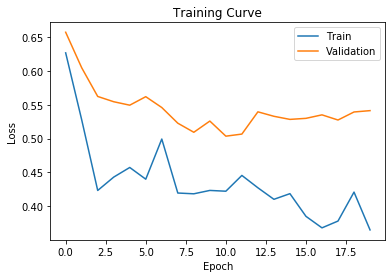

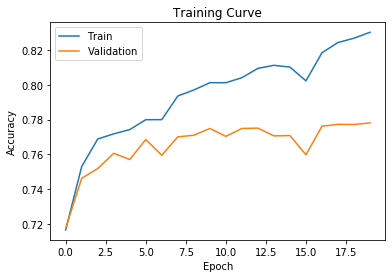

In [0]:
model = TweetRNN(200, 50, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.001)

Epoch 1; Train Loss 0.556881; Train Acc 0.761838; Val Loss 0.592447; Val Acc 0.744830
Epoch 2; Train Loss 0.463732; Train Acc 0.788291; Val Loss 0.543723; Val Acc 0.764963
Epoch 3; Train Loss 0.423590; Train Acc 0.814145; Val Loss 0.522529; Val Acc 0.778537
Epoch 4; Train Loss 0.348474; Train Acc 0.828120; Val Loss 0.539212; Val Acc 0.775440
Epoch 5; Train Loss 0.353885; Train Acc 0.849402; Val Loss 0.540952; Val Acc 0.775440
Epoch 6; Train Loss 0.378217; Train Acc 0.868205; Val Loss 0.567857; Val Acc 0.777444
Epoch 7; Train Loss 0.311805; Train Acc 0.886923; Val Loss 0.595922; Val Acc 0.772160
Epoch 8; Train Loss 0.258693; Train Acc 0.901581; Val Loss 0.642002; Val Acc 0.771158
Epoch 9; Train Loss 0.289045; Train Acc 0.916709; Val Loss 0.629949; Val Acc 0.769063
Epoch 10; Train Loss 0.221063; Train Acc 0.928718; Val Loss 0.690942; Val Acc 0.762139
Epoch 11; Train Loss 0.170123; Train Acc 0.938333; Val Loss 0.764038; Val Acc 0.756491
Epoch 12; Train Loss 0.256110; Train Acc 0.952350; V

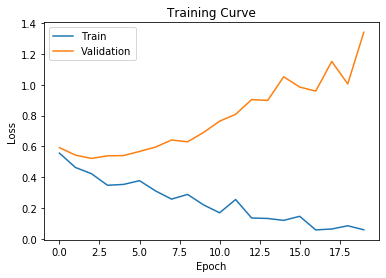

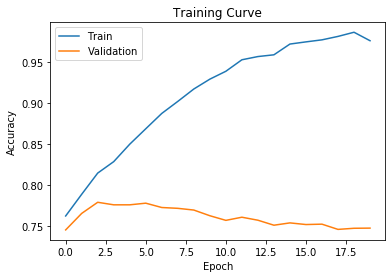

In [0]:
model = TweetRNN(200, 50, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.01)

Epoch 1; Train Loss 0.507628; Train Acc 0.726118; Val Loss 0.635187; Val Acc 0.718411
Epoch 2; Train Loss 0.622484; Train Acc 0.754706; Val Loss 0.565622; Val Acc 0.733443
Epoch 3; Train Loss 0.459029; Train Acc 0.770412; Val Loss 0.594551; Val Acc 0.755398
Epoch 4; Train Loss 0.419449; Train Acc 0.784529; Val Loss 0.545613; Val Acc 0.760044
Epoch 5; Train Loss 0.456134; Train Acc 0.803941; Val Loss 0.551959; Val Acc 0.771522
Epoch 6; Train Loss 0.384126; Train Acc 0.811118; Val Loss 0.552548; Val Acc 0.772251
Epoch 7; Train Loss 0.368678; Train Acc 0.833588; Val Loss 0.535444; Val Acc 0.773800
Epoch 8; Train Loss 0.375632; Train Acc 0.852000; Val Loss 0.551656; Val Acc 0.768334
Epoch 9; Train Loss 0.334374; Train Acc 0.861882; Val Loss 0.574669; Val Acc 0.766967
Epoch 10; Train Loss 0.340165; Train Acc 0.877235; Val Loss 0.601211; Val Acc 0.762321
Epoch 11; Train Loss 0.307686; Train Acc 0.873765; Val Loss 0.709909; Val Acc 0.760590
Epoch 12; Train Loss 0.275409; Train Acc 0.905824; V

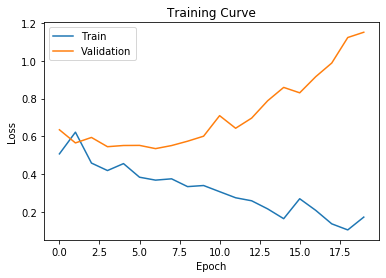

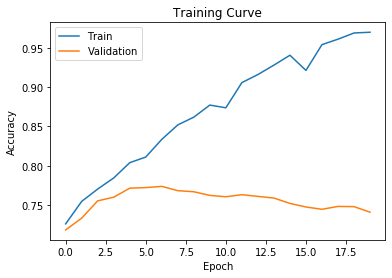

In [0]:
model = TweetRNN(200, 50, 2)
train_loader = TweetBatcher(train, batch_size=1000, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=1000, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.01)

In [0]:
class TweetRNN_GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetRNN_GRU, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)#nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out

Epoch 1; Train Loss 0.553798; Train Acc 0.700794; Val Loss 0.591668; Val Acc 0.700282
Epoch 2; Train Loss 0.426192; Train Acc 0.748173; Val Loss 0.535069; Val Acc 0.743099
Epoch 3; Train Loss 0.488487; Train Acc 0.758978; Val Loss 0.525588; Val Acc 0.756491
Epoch 4; Train Loss 0.442448; Train Acc 0.762475; Val Loss 0.514923; Val Acc 0.760955
Epoch 5; Train Loss 0.386255; Train Acc 0.768996; Val Loss 0.509674; Val Acc 0.763050
Epoch 6; Train Loss 0.381225; Train Acc 0.774351; Val Loss 0.500787; Val Acc 0.762686
Epoch 7; Train Loss 0.394171; Train Acc 0.776525; Val Loss 0.501255; Val Acc 0.769427
Epoch 8; Train Loss 0.405816; Train Acc 0.777942; Val Loss 0.495041; Val Acc 0.768880
Epoch 9; Train Loss 0.470116; Train Acc 0.779391; Val Loss 0.502246; Val Acc 0.769974
Epoch 10; Train Loss 0.517346; Train Acc 0.783676; Val Loss 0.494786; Val Acc 0.769700
Epoch 11; Train Loss 0.374019; Train Acc 0.782510; Val Loss 0.500977; Val Acc 0.770702
Epoch 12; Train Loss 0.472136; Train Acc 0.782038; V

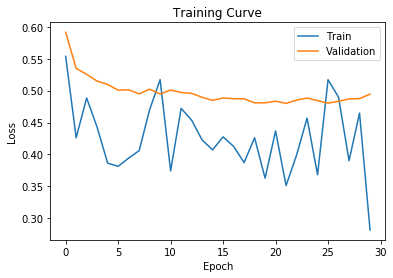

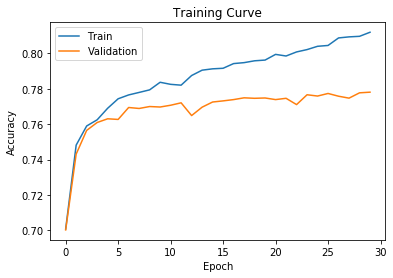

In [0]:
model = TweetRNN_GRU(200, 50, 2)
train_loader = TweetBatcher(train, batch_size=64, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=64, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=30, learning_rate=0.0001)

Epoch 1; Train Loss 0.419445; Train Acc 0.786181; Val Loss 0.510307; Val Acc 0.770338
Epoch 2; Train Loss 0.455055; Train Acc 0.815278; Val Loss 0.511474; Val Acc 0.775986
Epoch 3; Train Loss 0.455945; Train Acc 0.847083; Val Loss 0.543038; Val Acc 0.775166
Epoch 4; Train Loss 0.367676; Train Acc 0.889861; Val Loss 0.560027; Val Acc 0.771704
Epoch 5; Train Loss 0.325833; Train Acc 0.919896; Val Loss 0.596958; Val Acc 0.764052
Epoch 6; Train Loss 0.191925; Train Acc 0.949479; Val Loss 0.757699; Val Acc 0.759406
Epoch 7; Train Loss 0.235792; Train Acc 0.956319; Val Loss 0.860461; Val Acc 0.760773
Epoch 8; Train Loss 0.152183; Train Acc 0.964236; Val Loss 0.954751; Val Acc 0.754851
Epoch 9; Train Loss 0.107409; Train Acc 0.973403; Val Loss 1.076629; Val Acc 0.749203
Epoch 10; Train Loss 0.133335; Train Acc 0.975799; Val Loss 0.999967; Val Acc 0.748019
Epoch 11; Train Loss 0.076133; Train Acc 0.979861; Val Loss 1.123781; Val Acc 0.756309
Epoch 12; Train Loss 0.071136; Train Acc 0.981111; V

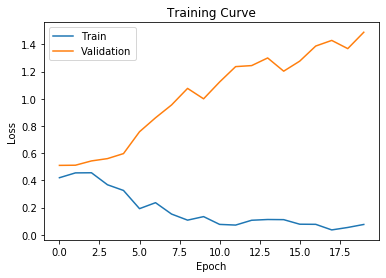

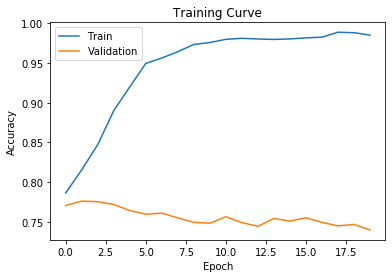

In [0]:
model = TweetRNN(200, 200, 2)#lstm
train_loader = TweetBatcher(train, batch_size=300, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=300, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.01)

Epoch 1; Train Loss 0.517223; Train Acc 0.761966; Val Loss 0.597295; Val Acc 0.747381
Epoch 2; Train Loss 0.402814; Train Acc 0.780897; Val Loss 0.538004; Val Acc 0.758222
Epoch 3; Train Loss 0.434360; Train Acc 0.812735; Val Loss 0.541552; Val Acc 0.774255
Epoch 4; Train Loss 0.375714; Train Acc 0.830085; Val Loss 0.556533; Val Acc 0.777170
Epoch 5; Train Loss 0.408433; Train Acc 0.851239; Val Loss 0.582965; Val Acc 0.775075
Epoch 6; Train Loss 0.365224; Train Acc 0.879017; Val Loss 0.569379; Val Acc 0.778628
Epoch 7; Train Loss 0.271463; Train Acc 0.898462; Val Loss 0.687855; Val Acc 0.767514


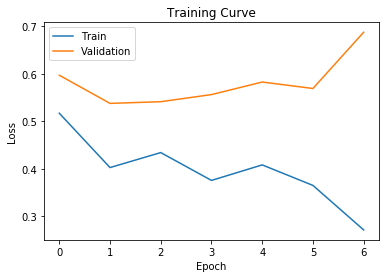

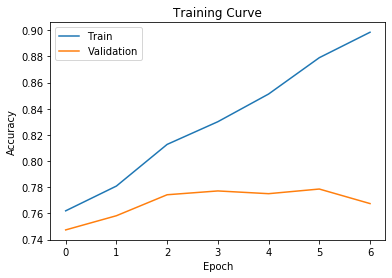

In [0]:
model = TweetRNN(200, 100, 2)#lstm
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=7, learning_rate=0.01)

Epoch 1; Train Loss 0.496817; Train Acc 0.762564; Val Loss 0.555262; Val Acc 0.753393
Epoch 2; Train Loss 0.438769; Train Acc 0.796026; Val Loss 0.519233; Val Acc 0.777444
Epoch 3; Train Loss 0.444711; Train Acc 0.815299; Val Loss 0.503335; Val Acc 0.780632
Epoch 4; Train Loss 0.369359; Train Acc 0.835256; Val Loss 0.500711; Val Acc 0.776715
Epoch 5; Train Loss 0.375004; Train Acc 0.828291; Val Loss 0.520358; Val Acc 0.754578
Epoch 6; Train Loss 0.315442; Train Acc 0.894145; Val Loss 0.524484; Val Acc 0.778992
Epoch 7; Train Loss 0.306558; Train Acc 0.915684; Val Loss 0.602211; Val Acc 0.768880
Epoch 8; Train Loss 0.186678; Train Acc 0.936838; Val Loss 0.654282; Val Acc 0.767058
Epoch 9; Train Loss 0.273723; Train Acc 0.953333; Val Loss 0.659942; Val Acc 0.758677
Epoch 10; Train Loss 0.211246; Train Acc 0.950812; Val Loss 0.885130; Val Acc 0.761410


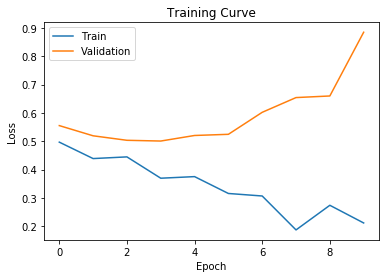

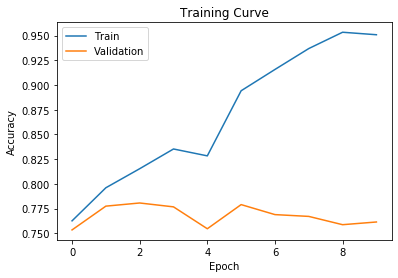

In [0]:
model = TweetRNN_GRU(200, 100, 2)#lstm
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=10, learning_rate=0.01)

Epoch 1; Train Loss 0.557530; Train Acc 0.766197; Val Loss 0.538007; Val Acc 0.754304
Epoch 2; Train Loss 0.420335; Train Acc 0.795812; Val Loss 0.532281; Val Acc 0.771887
Epoch 3; Train Loss 0.416408; Train Acc 0.811325; Val Loss 0.530735; Val Acc 0.775713


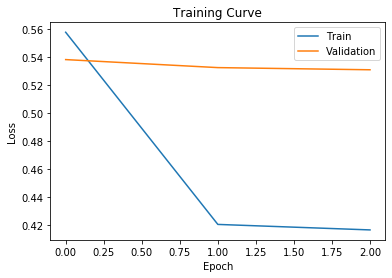

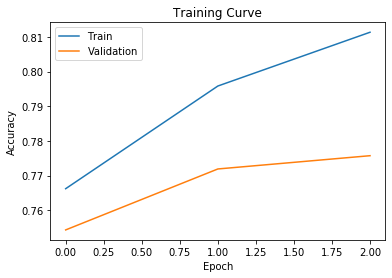

In [0]:
model = TweetRNN(200, 50, 2)#lstm
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=3, learning_rate=0.01)

Epoch 1; Train Loss 0.449020; Train Acc 0.772222; Val Loss 0.533827; Val Acc 0.764781
Epoch 2; Train Loss 0.394454; Train Acc 0.793291; Val Loss 0.508988; Val Acc 0.768880
Epoch 3; Train Loss 0.436326; Train Acc 0.815470; Val Loss 0.512097; Val Acc 0.778992
Epoch 4; Train Loss 0.459688; Train Acc 0.806453; Val Loss 0.536747; Val Acc 0.744284
Epoch 5; Train Loss 0.341788; Train Acc 0.863761; Val Loss 0.560732; Val Acc 0.773526
Epoch 6; Train Loss 0.346608; Train Acc 0.881667; Val Loss 0.632544; Val Acc 0.752118
Epoch 7; Train Loss 0.235813; Train Acc 0.937436; Val Loss 0.612760; Val Acc 0.767787
Epoch 8; Train Loss 0.178278; Train Acc 0.945556; Val Loss 0.618929; Val Acc 0.759770
Epoch 9; Train Loss 0.196195; Train Acc 0.937179; Val Loss 0.845791; Val Acc 0.741186
Epoch 10; Train Loss 0.188009; Train Acc 0.966368; Val Loss 0.774890; Val Acc 0.760044
Epoch 11; Train Loss 0.215786; Train Acc 0.974744; Val Loss 0.879284; Val Acc 0.750934
Epoch 12; Train Loss 0.195336; Train Acc 0.973846; V

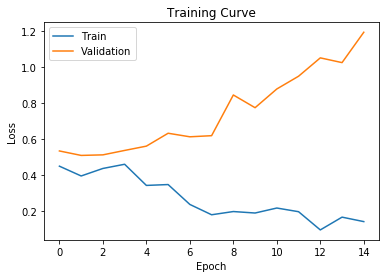

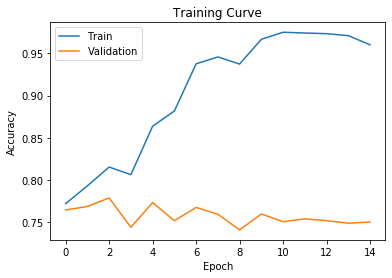

In [0]:
model = TweetRNN_GRU(200, 200, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=15, learning_rate=0.01)

Epoch 1; Train Loss 0.502686; Train Acc 0.770342; Val Loss 0.548162; Val Acc 0.756946
Epoch 2; Train Loss 0.458485; Train Acc 0.796581; Val Loss 0.526347; Val Acc 0.771249


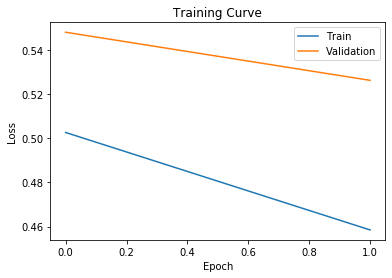

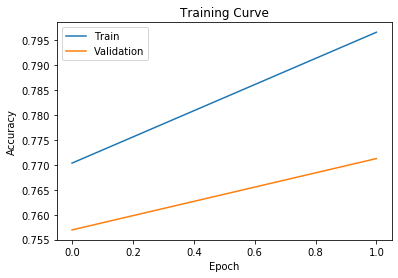

In [0]:
model = TweetRNN(200, 100, 2)#lstm
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=2, learning_rate=0.01)

Epoch 1; Train Loss 0.491697; Train Acc 0.772991; Val Loss 0.530043; Val Acc 0.770793
Epoch 2; Train Loss 0.443796; Train Acc 0.796282; Val Loss 0.522867; Val Acc 0.777626


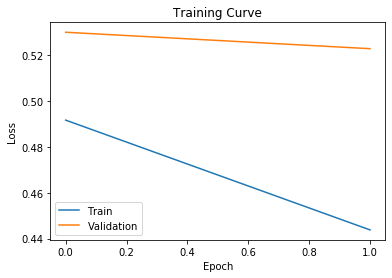

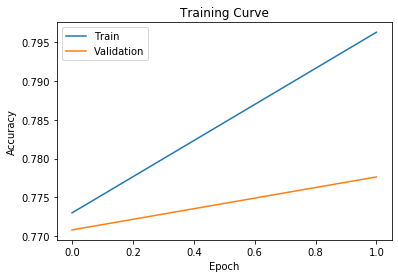

In [0]:
model = TweetRNN_GRU(200, 100, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=2, learning_rate=0.01)

Epoch 1; Train Loss 0.491223; Train Acc 0.775000; Val Loss 0.532659; Val Acc 0.762595
Epoch 2; Train Loss 0.390692; Train Acc 0.789701; Val Loss 0.520426; Val Acc 0.765145
Epoch 3; Train Loss 0.413936; Train Acc 0.814103; Val Loss 0.491871; Val Acc 0.775804
Epoch 4; Train Loss 0.397618; Train Acc 0.834658; Val Loss 0.517874; Val Acc 0.781817
Epoch 5; Train Loss 0.363290; Train Acc 0.862991; Val Loss 0.524278; Val Acc 0.778628
Epoch 6; Train Loss 0.298503; Train Acc 0.898034; Val Loss 0.562739; Val Acc 0.770702
Epoch 7; Train Loss 0.290832; Train Acc 0.917179; Val Loss 0.625819; Val Acc 0.770429
Epoch 8; Train Loss 0.237385; Train Acc 0.940256; Val Loss 0.771285; Val Acc 0.763961
Epoch 9; Train Loss 0.127815; Train Acc 0.949701; Val Loss 0.921889; Val Acc 0.754304
Epoch 10; Train Loss 0.170402; Train Acc 0.958205; Val Loss 0.879581; Val Acc 0.760955
Epoch 11; Train Loss 0.164018; Train Acc 0.964017; Val Loss 1.016192; Val Acc 0.758495
Epoch 12; Train Loss 0.085994; Train Acc 0.971709; V

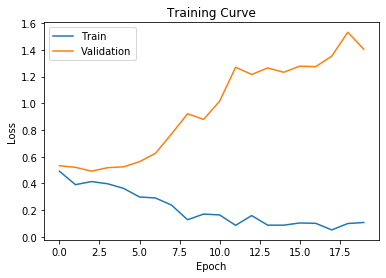

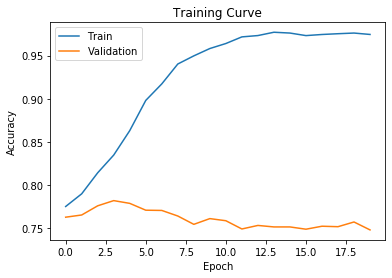

In [0]:
model = TweetRNN_GRU(200, 100, 2)
train_loader = TweetBatcher(train, batch_size=600, drop_last=True)
valid_loader = TweetBatcher(valid, batch_size=600, drop_last=False)
train_rnn_network(model, train_loader, valid_loader, num_epochs=20, learning_rate=0.01)

In [0]:
def get_new_tweet(glove_vector, sample_tweet):
    tweet = sample_tweet
    idxs = [glove_vector.stoi[w]        # lookup the index of word
            for w in split_tweet(tweet)
            if w in glove_vector.stoi] # keep words that has an embedding
    idxs = torch.tensor(idxs) # convert list to pytorch tensor
    return idxs

In [0]:
new_tweet = get_new_tweet(glove, "This is a terrible tragedy")
#print(new_tweet.shape)

out = torch.sigmoid(model(new_tweet.unsqueeze(0)))
pred = out.max(1, keepdim=True)[1]
print(pred)

TypeError: ignored

In [0]:
new_tweet = get_new_tweet(glove, "")
print(new_tweet.shape)

out = torch.sigmoid(model(new_tweet.unsqueeze(0)))
pred = out.max(1, keepdim=True)[1]
print(pred)

TypeError: ignored

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df_train['text'])
test_vectors = vectorizer.transform(df_test['text'])

In [0]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
print(df_train['label'])
classifier_linear.fit(train_vectors, df_train['label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_test['label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
32899    pos
32900    pos
32901    pos
32902    pos
32903    pos
Name: label, Length: 32904, dtype: object
Training time: 277.011985s; Prediction time: 30.577436s
positive:  {'precision': 0.7757407407407407, 'recall': 0.7641371762130609, 'f1-score': 0.7698952398456167, 'support': 5482}
negative:  {'precision': 0.768445558739255, 'recall': 0.7798982188295165, 'f1-score': 0.7741295327440013, 'support': 5502}


In [0]:
test_loader = TweetBatcher(test, batch_size=600, drop_last=False)

In [0]:
test_accuracy = get_accuracy(model, test_loader)
print(test_accuracy)

0.7845957756737072
